## 1. Library Imports and Data Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Driver model - Multiple regression 

In [3]:
driver_df = pd.read_csv("data/driver_data_v3.csv")

In [4]:
driver_df

,driver,position,gap_to_leader,fantasy_points
0,VER_r1,3,0.238,45
1,PER_r1,8,0.424,31
2,NOR_r1,5,0.294,16
3,LEC_r1,4,0.270,22
4,SAI_r1,1,0.000,36
...,...,...,...,...
95,SAR_r5,15,1.984,8
96,HUL_r5,5,0.799,4
97,TSU_r5,12,1.704,-6
98,RIC_r5,9,0.936,-6


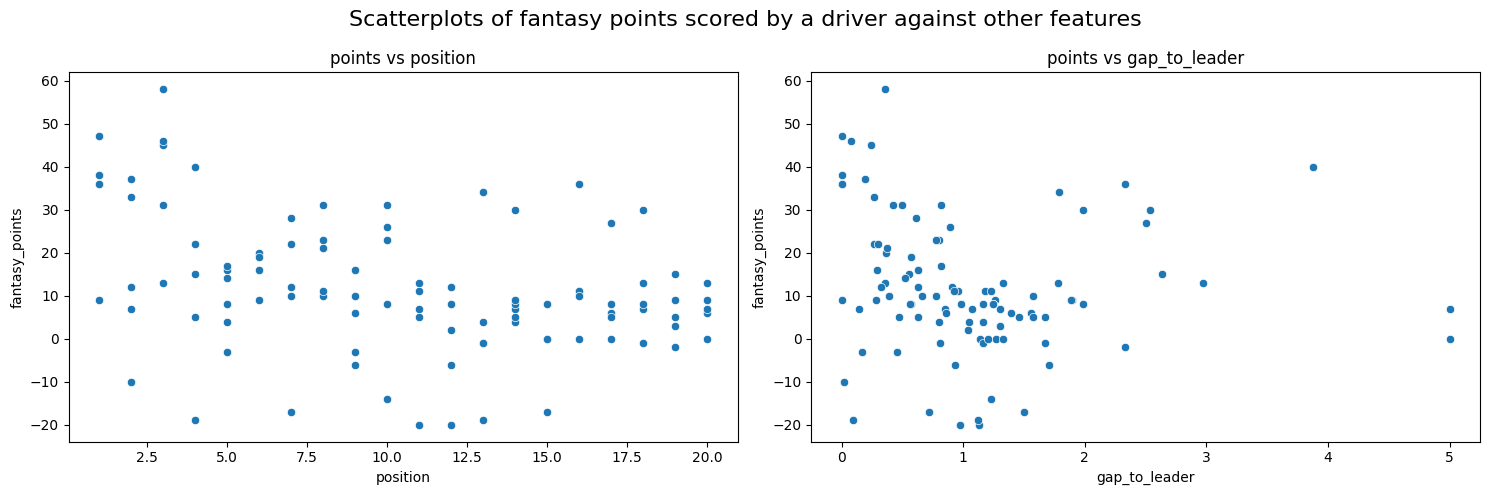

In [12]:
# Make sure the relationship looks linear
possible_features = ['position', 'gap_to_leader']

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)

# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=driver_df, x=feature, y="fantasy_points", ax=axes[index])
    axes[index].set_title(f'points vs {feature}')

fig.suptitle("Scatterplots of fantasy points scored by a driver against other features", fontsize=16)
fig.tight_layout()

In [7]:
# Create the model with everything first
selected_features = ['position', 'gap_to_leader']
y_train = driver_df["fantasy_points"]

# Initialize the model
model = LinearRegression()

# Perform backward selection
while len(selected_features) > 1:
    # Train and calculate initial score
    X_train = driver_df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    print("Features:", selected_features, "Score:", initial_score)

    worst_feature = None
    worst_score_diff = 1
    
    for feature in selected_features:
        # Create a new model without the current feature
        X_temp = X_train.drop(feature, axis=1)
        
        # Fit the model on the training data
        model.fit(X_temp, y_train)
        
        # Evaluate the model
        score = model.score(X_temp, y_train) 

        # Find the difference in the scores
        score_diff = initial_score - score

        print("Feature:", feature, "Score Diff:", score_diff, "Score:", score)
        
        # Update the worst feature if the current feature worsens the score
        if score_diff < worst_score_diff:
            worst_score_diff = score_diff
            worst_feature = feature
    
    # Remove the worst feature from the list of selected features
    selected_features.remove(worst_feature)
    print("Removed Feature:", worst_feature)

# Print final feature score
X_train = driver_df[selected_features]
model.fit(X_train, y_train)
initial_score = model.score(X_train, y_train)

print("Features:", selected_features, "Score:", initial_score)

Features: ['position', 'gap_to_leader'] Score: 0.17237555292806261
Feature: position Score Diff: 0.15608931285588823 Score: 0.016286240072174385
Feature: gap_to_leader Score Diff: 0.0375461275227299 Score: 0.13482942540533271
Removed Feature: gap_to_leader
Features: ['position'] Score: 0.13482942540533271


In [8]:
# Extract Data
X = driver_df[['position', 'gap_to_leader']]
y = driver_df["fantasy_points"]

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[-1.58104252  5.77884568] 23.058279847922627


In [13]:
X_test

,position,gap_to_leader
66,3,0.355
32,14,1.163
46,5,0.172
28,6,0.626
74,18,1.779
23,2,0.196
10,16,1.176
20,1,0.000
17,13,0.807
35,20,5.000


In [9]:
# make predictions on test data
y_pred = model.predict(X_test)

In [10]:
model.score(X_test, y_test)

0.06851590277019703

## Constructor model - Multiple regression 

In [16]:
constructor_df = pd.read_csv("data/constructor_data_v2.csv")

In [17]:
constructor_df

,constructor,r1,r2,r3,r4,r5,picked
0,RED,89,90,32,108,126,2.4
1,FER,73,58,92,59,74,3.0
2,MER,42,36,-17,28,62,0.0
3,MCL,36,41,54,39,62,0.6
4,AST,20,9,35,32,29,0.0
5,ALP,12,-13,6,11,28,0.0
6,HAA,9,19,20,20,26,0.0
7,WIL,4,14,5,-10,20,0.0
8,KCK,10,-4,7,-8,4,0.0
9,VRB,7,4,24,-4,-14,0.0


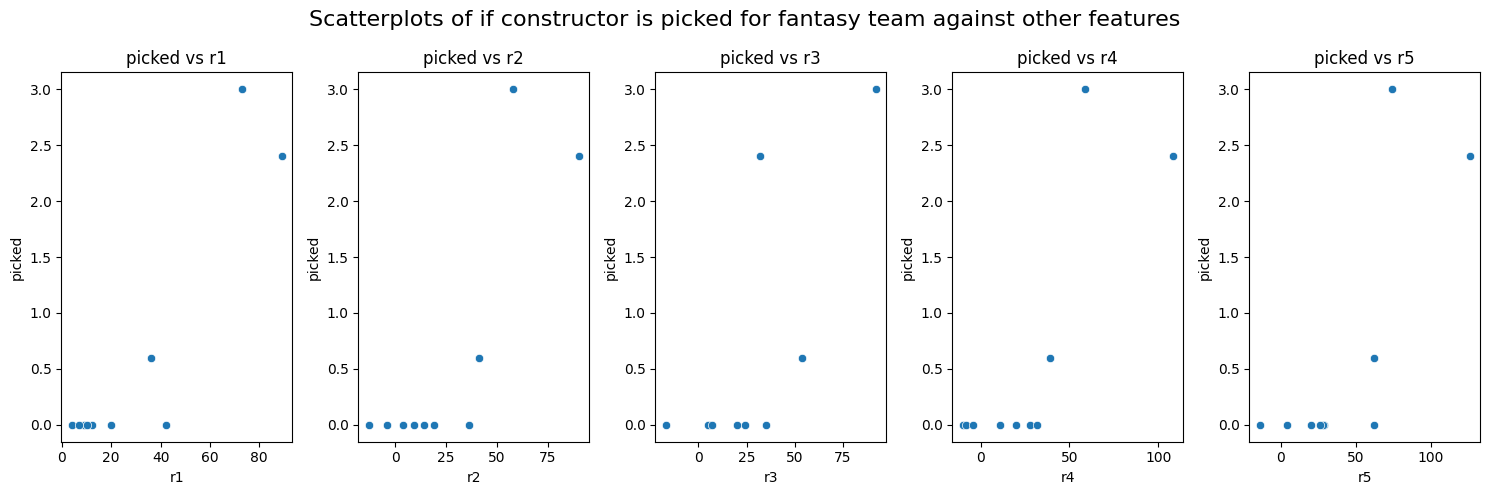

In [18]:
# Make sure the relationship looks linear
possible_features = ['r1', 'r2', 'r3', 'r4', 'r5']

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)

# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=constructor_df, x=feature, y="picked", ax=axes[index])
    axes[index].set_title(f'picked vs {feature}')

fig.suptitle("Scatterplots of if constructor is picked for fantasy team against other features", fontsize=16)
fig.tight_layout()

## Use backward elimination to select our features

In [ ]:
# Create the model with everything first
selected_features = ["r1", "r2", "r3", "r4", "r5"]
y_train = constructor_df["picked"]

# Initialize the model
model = LinearRegression()

# Perform backward selection
while len(selected_features) > 1:
    # Train and calculate initial score
    X_train = constructor_df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    print("Features:", selected_features, "Score:", initial_score)

    worst_feature = None
    worst_score_diff = 1
    
    for feature in selected_features:
        # Create a new model without the current feature
        X_temp = X_train.drop(feature, axis=1)
        
        # Fit the model on the training data
        model.fit(X_temp, y_train)
        
        # Evaluate the model
        score = model.score(X_temp, y_train) 

        # Find the difference in the scores
        score_diff = initial_score - score

        print("Feature:", feature, "Score Diff:", score_diff, "Score:", score)
        
        # Update the worst feature if the current feature worsens the score
        if score_diff < worst_score_diff:
            worst_score_diff = score_diff
            worst_feature = feature
    
    # Remove the worst feature from the list of selected features
    selected_features.remove(worst_feature)
    print("Removed Feature:", worst_feature)

# Print final feature score
X_train = constructor_df[selected_features]
model.fit(X_train, y_train)
initial_score = model.score(X_train, y_train)

print("Features:", selected_features, "Score:", initial_score)

Should onlt use features 'r1', 'r3', and 'r4' because the provide the best score without over-fitting the data

In [28]:
# Extract Data
X = constructor_df[["r1", "r3", "r4"]]
y = constructor_df["picked"]

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[ 0.0386296   0.01454342 -0.01013457] -0.6915012284458744


In [29]:
# make predictions on test data
y_pred = model.predict(X_test)

In [31]:
# accuracy
model.score(X_test, y_test)

0.0

# Driver model --> logistic regression

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [15]:
df = pd.read_csv("data/driver_data_v4.csv")

In [17]:
# extract data
X = df[["position", "gap_to_leader"]]
y = df["picked"]

# split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# create model
model = LogisticRegression()

# train model
model = model.fit(X_train, y_train)

In [18]:
# make predictions on test data
y_pred = model.predict(X_test)

Text(50.722222222222214, 0.5, 'Actual')

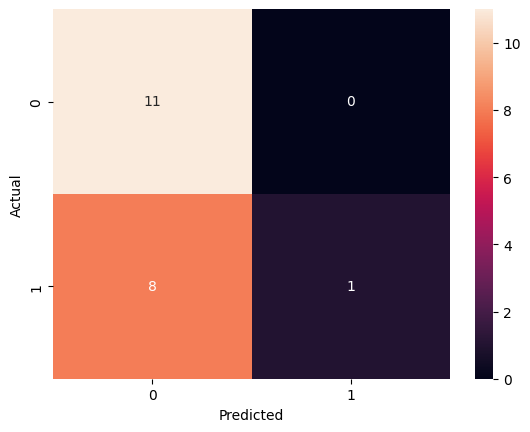

In [19]:
# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# plot 
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [20]:
model.score(X_test, y_test)

0.6

In [22]:
position = int(input("What position is the driver? "))
gap = float(input("How far behind the leader are they? "))

train = [position, gap]

y_pred = model.predict([train])
print(y_pred)

[0]


/Users/lilianadhaliwal/Desktop/ATCS/Final Project/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
